# Case Study: A Chocolatey Analysis

### <i> Executive Summary </i>

The story of a chocolate bar, whether it be a Hershey Kiss, a large Toblerone, or the darkest Lindt chocolate in the grocery store start with a simple cocoa bean. These beans are grown in various parts of the world where they are nutured and distributed all over the world to reach the mouths of almost every single indvidual who loves chocolate. On average, each year, Canadians consume 5.5 kilograms of chocolate, however every citizen of the world has a different liking to different kinds of chocolate. Some may enjoy a highly rich 80% cocoa bean chocolate bar, while others like a more subtle 50 or 60%. In this case study, we explore how taste differs in each individual. 

The purpose of this case study is highlight customer satisfication of chocolate bars, based on the region the cocoa bean is grown, produced, and the percent of cocoa the chocolate bar has in it's ingredients. In order to conduct this analysis, open source data was used from https://www.kaggle.com/rtatman/chocolate-bar-ratings and the program Python 3 will be utlized to conduct the analysis. 

Consumer ratings were measured on a scale of 1 to 5, where 1 was either unpleasant or unpalatable, 3 was satisfactory and 5 was above and beyond. The chocolate bars were rated by the basis of texture, flavor, aftermelt, and the overall experience. The full experiment was done by Brady Brelinsku and team, and can be found here: http://flavorsofcacao.com/index.html

The questions that this case study will delve deeper into are: 
<br/> 1) What percent of Cocoa has the highest and most consumer ratings ? </n>
<br/> 2) What are the top 10 countries that produce the highest rated chocolate bars? 
<br/> 3) Which countries have the highest amount of chocolate vendors?
<br/> 4) How can you compare the maximum cocoa percentage to the cocoa percentage that is most used in chocolate bars? 

This analysis will bring some insight into consumer patterns in the chocolate industry. It will be possible to perhaps see a pattern in the data that could lead us to observe why a specific amount of cocoa is used in chocolate bars and how it will affect consumer rating. Finally, it will show us how geographic factors have an impact on the consumption of chocolate, and where the highest rated chocolate and cocoa beans come from. 


#### Libraries in Use and Importing the Data

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas import Series, DataFrame

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [147]:
df = pd.read_csv("flavors_of_cacao.csv")

<u> Data at a Glance </u>

In [148]:
df.head() #the data contains around 1796 rows and 9 columns
          #For the purpose of the case study I will be showing the first 5 rows
    
          #however the entire dataset will be utlized

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [149]:
# I will be changing the column names in order to simplify data manipulation 
df.columns = ['Company', 'Origin', 'REF', 'Review_Date', 'Cocoa_Percent', 'Company Location', 
              'Rating', 'Bean_Type', 'Bean_Org']

For the purpose of this analysis, the data will be manipulated in such that plotting the data will allow for easier data visualization. First, the Company type is changed to category. Then, Cocoa Percent is changed to replace the percent sign with just the number as Python will not be able to recognize the special character

In [150]:
df['Company']=df['Company'].astype('category')
df['Cocoa_Percent']=(df['Cocoa_Percent']).str.replace('%', ' ')
df['Cocoa_Percent']=(df['Cocoa_Percent']).astype(float)

In [151]:
df.head()

,Company,Origin,REF,Review_Date,Cocoa_Percent,Company Location,Rating,Bean_Type,Bean_Org
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


<b>After these manipulations, below there is a summary of the statistical measurements. On average, users rate chocolate bars at around 3.2 (satisfactory), the average percent of cocoa used is around 70%, and the top company that sells these chocolate bars is the U.S.A. </b>

* Note that anywhere there is a NaN, measurements could not be taken as it was not numerical data, or it could not be translated into a statistic

In [152]:
print("Table 1: Summary of Statistical Measurements")
df.describe(include='all').T

Table 1: Summary of Statistical Measurements


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795,NaN,NaN,NaN,1035.9,552.886,5,576,1069,1502,1952
Review_Date,1795,NaN,NaN,NaN,2012.33,2.92721,2006,2010,2013,2015,2017
Cocoa_Percent,1795,NaN,NaN,NaN,71.6983,6.32312,42,70,70,75,100
Company Location,1795,60,U.S.A.,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1795,NaN,NaN,NaN,3.18593,0.478062,1,2.875,3.25,3.5,5
Bean_Type,1794,41,,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bean_Org,1794,100,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The average percent of cocoa in a chocolate bar is around 70%, and the average rating that consumers are giving to chocolate bars is 3.1. Most of the chocolate bars were reviewed in 2012, with the data collection starting in 2006, up until 2017. Finally, the top country that produces the cocoa beans is Venezuala. 

### 1) Percent of Cocoa with the highest and most consumer ratings 

Fig 1: Count of Chocolate Bar Ratings


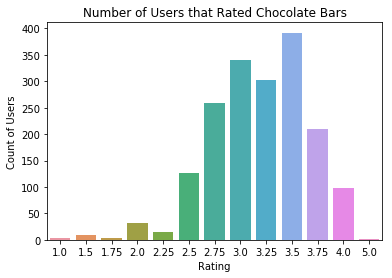

In [153]:
sns.countplot(x='Rating', data=df)
plt.xlabel('Rating')
plt.ylabel('Count of Users')
plt.title('Number of Users that Rated Chocolate Bars')
print('Fig 1: Count of Chocolate Bar Ratings')

First and foremost, it is important to know just how many chocolate bars were rated. In total, around 1795 chocolate bars were rated from 63 countries. The most number of ratings that were given was between 3.0 to 3.5, with the highest being 3.5 with a number of around 380 ratings. This shows us that most individuals are giving chocolate bars a rating of a little bit more than satisfactory. Moving on, we observe the patterns in the percent of cocoa that is out in each chocolcate bar. 

Fig 2: Count of Cocoa Percentage


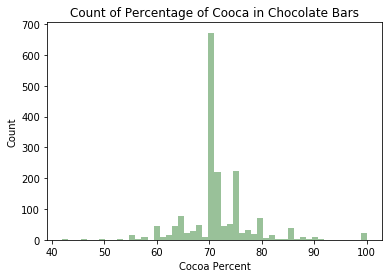

In [154]:
sns.distplot(a=df['Cocoa_Percent'], hist=True,kde=False,rug=False, color='darkgreen') 
#count of average percentage of chocolate bars 
plt.xlabel('Cocoa Percent')
plt.ylabel('Count')
plt.title('Count of Percentage of Cooca in Chocolate Bars')
print('Fig 2: Count of Cocoa Percentage')

As figure 2 shows us, most chocolate bars are made with around 70 to 75% cocoa in the bar. With close to 700 chocolate bars being made with 70% cocoa. Less than one hundred bars are made with 60% or less cocoa, and the number is even smaller for chocolate bars with 80% or higher cocoa in them. Does the data tell us anything about how consumers are rating chocolate bars based on the percentage of cocoa that is used in each bar? The following figure aims to observe if there is a relationship between the percent of cocoa used, and consumer ratings. 

In [155]:
plot_data = [go.Scatter(x=df['Cocoa_Percent'].tolist(),y=df["Rating"], mode='markers', marker=dict(color='lightblue',
        line=dict(color='darkblue', width=1,),symbol='circle',size=16,))]

plot_layout = go.Layout(title="Rating of Chocolate Bars by Cocoa Percent", xaxis=dict(title='Cocoa Percent'), 
                        yaxis=dict(title='Rating'))

fig = go.Figure(data=plot_data, layout=plot_layout)

iplot(fig)
print("Fig 3: Chocolate Bar Rating Based on Cocoa Percent")

Fig 3: Chocolate Bar Rating Based on Cocoa Percent


As the data shows in figure 3, a large proportion of chocolate bars are made with 60 - 80% cocoa, with a large proportion being made with 70% cocoa.<br/> Of the 70% cocoa, most are rated between 3.0 to 4.0, telling us that people are more likely to enjoy chocolate bars that are around 70% cocoa. Another observation to note is how the data is scattered. There is no clear pattern nor correlation. The data shows us that preference is largely variable, there are a few outliers that prefer 42% and 46 % cocoa levels. 

### What Does this Tell Us?
<br/> The data shows us that the percent of cocoa in chocolate bars is highly variable, not falling below 40%. Likewise, how individuals are prefering their chocolate bars is variable as well. We can however observe that chocolate bars with a cocoa percent between 60 - 80 % are more popular in the amount that they are sold, as well as preference rating. In sum, we can take this information and apply it chocolate sales. The data allows us to observe why and if more chocolate bars are selling better than others to help chocolate companies increase their sales, and predict their future sales based on customer preferences. 

### 2) Top 20 Countries That Produce the Highest Rated Chocolate Bars

In [156]:
origin_max = df.groupby(['Bean_Org'])['Rating'].max()

In [157]:
max_desc=origin_max.sort_values(ascending=False)
top_20_bean=max_desc[:21]
top_20_bean.head(21)
data = top_20_bean.head(21)

In [158]:
data2 = data = {'Bean Origin': ['Venezuela ', 'Venezuela', 'Guatemala', 'Sao Tome & Principe', 'Sao Tome', 
                                'Peru, Dom. Rep', 'Peru', 'Papua New Guinea', 'Nicaragua', 
                                'Madagascar', 'Jamaica', 'Indonesia', 'Haiti', 'Guat., D.R., Peru, Mad., PNG', 
                                'St. Lucia', 'Gre., PNG, Haw., Haiti, Mad', 'Ghana', 'Ecuador', 
                                'Dominican Republic', 'Dom. Rep., Madagascar'],
        'Rating': [ 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,
                   4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]}
table = pd.DataFrame(data2)
table = pd.DataFrame(data, columns=['Bean Origin', 'Rating'],
                      index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
print("Table 1: Top 20 Countries Where Beans Originate")
table

Table 1: Top 20 Countries Where Beans Originate


,Bean Origin,Rating
1,Venezuela,5.0
2,Venezuela,5.0
3,Guatemala,4.0
4,Sao Tome & Principe,4.0
5,Sao Tome,4.0
6,"Peru, Dom. Rep",4.0
7,Peru,4.0
8,Papua New Guinea,4.0
9,Nicaragua,4.0
10,Madagascar,4.0


### What Does this Tell Us?
The data observed is largely based on customer preference of chocolate bars. However, one of the most important ingredients of a chocolate bar is the cocoa bean. Where the cocoa bean comes from is tells us a couple different things: for once, it will tell us which countries produce the premium chocolate bars, and which region of the world are they located. 
<br/> In Table 1, the data shows us that the beans with the highest rating of chocolate bars are coming from Venezuela, with both bars being rated as 5.0. All the other countries that have a high rating of 4.0 have beans coming from the South American continent as well as Africa, and the Carribean countries. Finally, we have one outlier country of Indonesia from which a highly rated bean is coming from. 

### 3) Countries with Highest Amount of Chocolate Vendors

In [159]:
df['Company Location'].value_counts().head(15)

U.S.A.         764
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Austria         26
Spain           25
Colombia        23
Hungary         22
Venezuela       20
Name: Company Location, dtype: int64

Fig 4: 15 Companies with the Highest Chocolate Vendors


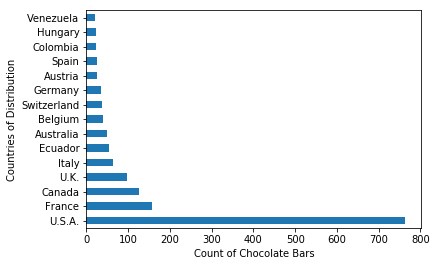

In [160]:
df['Company Location'].value_counts().head(15).plot('barh')
plt.xlabel('Count of Chocolate Bars')
plt.ylabel('Countries of Distribution')
print("Fig 4: 15 Companies with the Highest Chocolate Vendors")

### What Does This Tell Us?
Next, it is worthwhile to note which countries have the highest chocolate vendors, and thereby even the highest sales. Using the data, I pulled the top 15 countries that have the highest number of chocolate vendors. According to Figure 4, the USA has the highest number of chocolate distributers, totaling a count of 764. The next highest distributers are France and Canada. This data can help us determine where the highest number of consumers are located, and for future studies, help us look at import and export patterns from these countries. The data also shows us that most countries have around 20 to 50 distributers, which could helps us guage the revenue of chocolate companies in each of these countries and predict whether it would be harmful or beneficials to implement more chocolate bar distributors. 

### 4) Comparison of the Maximum Cocoa Percentage and the Mean Cocoa Percentage 

In [167]:
cocoa_one_hundred=df[df['Cocoa_Percent' ] == 100.0] 
#how many chocolate bars have a 100 percent rating 
cocoa_one_hundred.count()

Company             20
Origin              20
REF                 20
Review_Date         20
Cocoa_Percent       20
Company Location    20
Rating              20
Bean_Type           20
Bean_Org            20
dtype: int64

Fig 4: Ratings of Chocolate Bars with 100% Cocoa


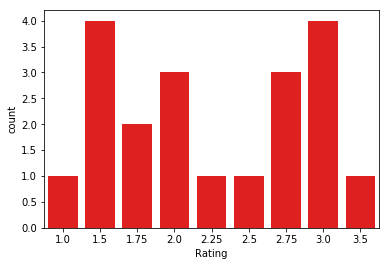

In [162]:
sns.countplot(x='Rating', data=cocoa_one_hundred, color='red')
print("Fig 5: Ratings of Chocolate Bars with 100% Cocoa")

In [168]:
cocoa_seventy=df[df['Cocoa_Percent' ] == 70.0]
cocoa_seventy.count()

Company             672
Origin              672
REF                 672
Review_Date         672
Cocoa_Percent       672
Company Location    672
Rating              672
Bean_Type           671
Bean_Org            672
dtype: int64

Fig 5: Ratings of Chocolate Bars with 70% Cocoa


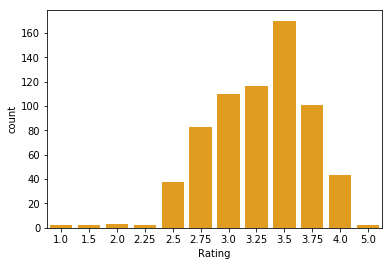

In [164]:
sns.countplot(x='Rating', data=cocoa_seventy, color='orange')
print("Fig 6: Ratings of Chocolate Bars with 70% Cocoa")

In [165]:
full_rating=df[df['Rating' ] == 5.0]
full_rating

,Company,Origin,REF,Review_Date,Cocoa_Percent,Company Location,Rating,Bean_Type,Bean_Org
78,Amedei,Chuao,111,2007,70.0,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,70.0,Italy,5.0,Blend,


This comparison was most interesting to me. First, using the data, I found out how many chocolate bars had 100 % cocoa, which was the maximum amount of cocoa used in this survey, and in chocolate bars in general. Arounf 20 chocolate bars had a percentage of 100% cocoa, all originating from different parts of the world, and sold around the world in different companies. The reason to do so was to find out how consumers are rating chocolate bars that have 100% cocoa. These would be the most rich, and perhaps the most darkest and bitter bars, as they would not have many other ingredients to mask the taste of cocoa. As figure 4 shows us, most consumers do not refer chocolate bars that have 100% cocoa in them. At most, they are rating it at 3.5, with more ratings for around 3.0 (satisfactory), while most individuals felt that these chocolate bars were around a 1.5 - palatable but unpleasant. There are many number of factors that would give this result, one being if this result is due to the bitterness of the chocolate, or, is it because of the type of bean that is used? More experiments would have to follow to solve these questions. 
<br/> Moving forward, I then observed that the mean amount of cocoa percent that was used is 70%. There is probably some reason why this is the most used amount of cocoa - perhaps it has a relationship with how individuals prefer their chocolate bars? I saw that around 672 chocolate bars are made with 70% cocoa in them. We already observed in Figure 3 that most individuals rate chocolate bars with 70% cocoa with a rating of 3.5 (above satisfactory, approaching pleasurable), and when taking a closer look in Figure 4, the result matches. Moreover, when I isolated the two chocolate bars that were rating as "above and beyond" (5.0), the data showed me that both of these chocolate bars had a rating of 70%. Most individuals are prefering chocolate bars that have just enough cocoa to taste it in their desserts, but not enough to be overbearing. This would be a result of having a good blend of different ingredients in their chocolate bars, and people enjoying a more diverse chocolatey taste, rather than just tasting pure cocoa bean. 

## Conclusion

In conclusion, this data can be very valuable to individuals in the chocolate industry. Consumer preference can be useful to determine how well a chocolate bar will sell. For instance, if it is not selling well, is it due to the amount of cocoa is in it? Perhaps the chocolate bar is too costly because of where the bean in coming from. Factors such as these help us get in touch with different factors if customer behaviour and can help us predict how well a chocolate bar will do in the near future. We can see that most chocolate bars that have a cocoa percent of 70% do much better than if they have more or less cocoa. Also, we can observe that cocoa beans that come from South American countries, and African countries are rated much higher, we can then use this data to pitch ideas to companies where the most chocolate is made (USA, France, Canada, etc.) to see if we can increase sales, or perhaps customer preference of certain chocolate bars. The chocolate industry is large, and quite old and customer data helps us be in touch with the comings and goings of chocolate sales and how people are enjoying their chocolate. 
<br/> Thank you for reading, and I hope you found this to be insightful. Next time you buy chocolate, pay attention to the amount of cocoa that is in it! Is it around 70%, if so, does that make you like the treat more, or less? 